In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import colors
from matplotlib.colors import LogNorm
import math

%matplotlib inline
from scipy.optimize import curve_fit, minimize
import strax
import straxbra

Using TensorFlow backend.


In [2]:
ctx = straxbra.XebraContext()
run = '00093'
peaks_data = ctx.get_array(run, 'peaks')
waveform = peaks_data['data']
integral = peaks_data['area']
width = peaks_data['width'][:,5]
timestamp = peaks_data['time']

In [21]:
def CutCondition(waveform):  
    FirstPeak_area = sum(waveform[:15])
    SecondPeak_area = sum(waveform[15:])
    FirstPeak_maximum = max(waveform[:15])
    SecondPeak_maximum = max(waveform[15:])
    SecondPeak_index = np.where(waveform == SecondPeak_maximum)
    SecondPeak_index_left = SecondPeak_index[0][0] -1
    SecondPeak_index_right = SecondPeak_index[0][0] +1
    SecondPeak_maximum_left = waveform[SecondPeak_index_left]
    SecondPeak_maximum_right = waveform[SecondPeak_index_right]




    if  FirstPeak_area > 100 and FirstPeak_area < 500 and SecondPeak_area > 40 and SecondPeak_area  < 200 \
    and SecondPeak_maximum < 0.5 * FirstPeak_maximum \
    and SecondPeak_maximum > 0.25 * FirstPeak_maximum \
    and SecondPeak_maximum > waveform[SecondPeak_index_left] \
    and SecondPeak_maximum > waveform[SecondPeak_index_right] \
    : 
        return(True)
    else:
        return(False)

    
# def CutCondition(waveform):  
#     FirstPeak_area = sum(waveform[:15])
#     SecondPeak_area = sum(waveform[15:])    
#     if  FirstPeak_area > 100 and FirstPeak_area < 500 and SecondPeak_area > 40 and SecondPeak_area  < 200: 
#         return(True)
#     else:
#         return(False)
    
    
def drifttime_to_z(t,ai, bi):
    return ai * t + bi    
    
def S2_found(integral, width):
    if integral > 500 and width >200 and width < 2000:
        return True
    else:
        return False
    
def PrintWaveform(waveform):

    fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1, 5, sharex=False, figsize=(15, 3.5))

    ax1.plot(waveform[i])
    ax2.plot(waveform[i+1])
    ax3.plot(waveform[i+2])
    ax4.plot(waveform[i+3])
    ax5.plot(waveform[i+4])
#     ax1.set_xlim([0, 50])
    plt.show()
    
def Process(waveform,i, aii, bii, timestamp): 
    SelectionCutFlag = CutCondition(waveform[i])
    if SelectionCutFlag == True:
        j = 1
        counter_timestamp = timestamp[i+j]
        threshold_timestamp = timestamp[i] + 45000
        while threshold_timestamp >= counter_timestamp and  S2_found(integral = integral[i+j], width = width[i+j]) == False:  
            j += 1
            counter_timestamp = timestamp[i+j]
        else:
            if S2_found(integral = integral[i+j], width = width[i+j]):
                k=1 
                s2_counter_timestamp = timestamp[i+j+k]
                z_position = drifttime_to_z(t=(timestamp[i+j] - timestamp[i]), ai=aii, bi=bii)
                PrintWaveform(waveform,i)
            else:
                return
    else:
        return


0.0 

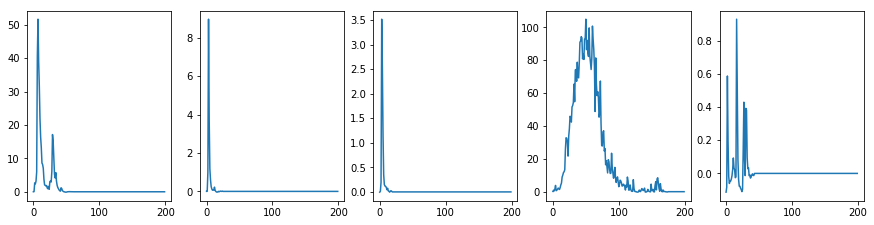

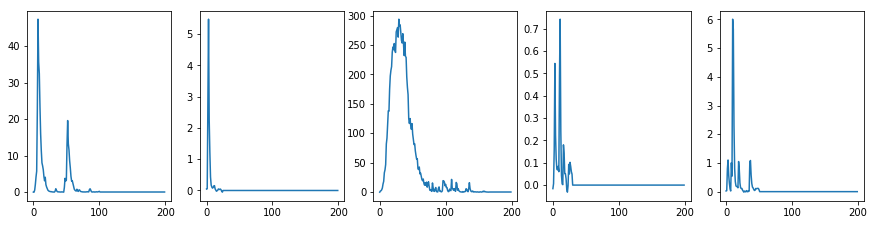

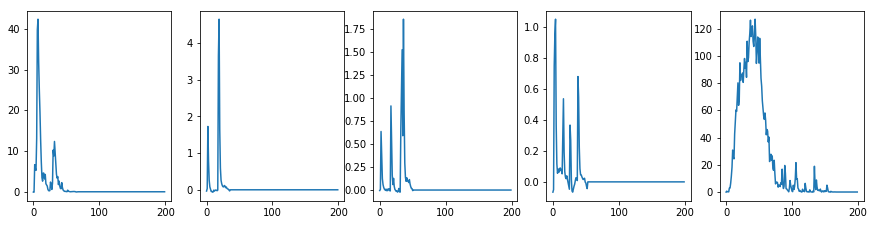

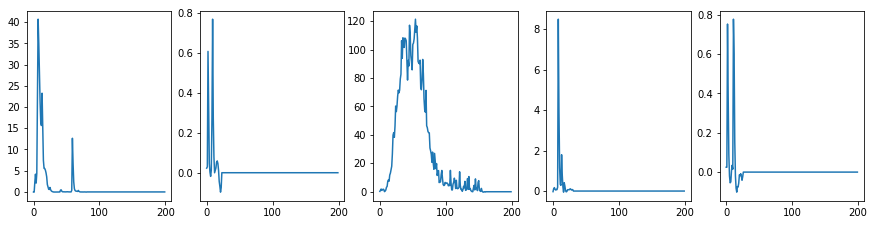

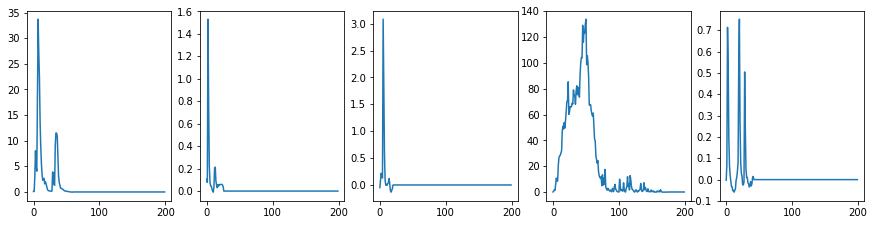

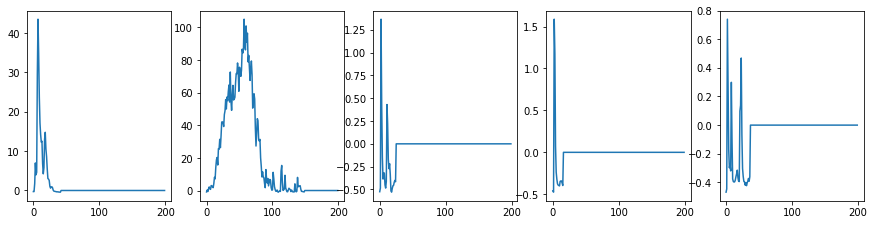

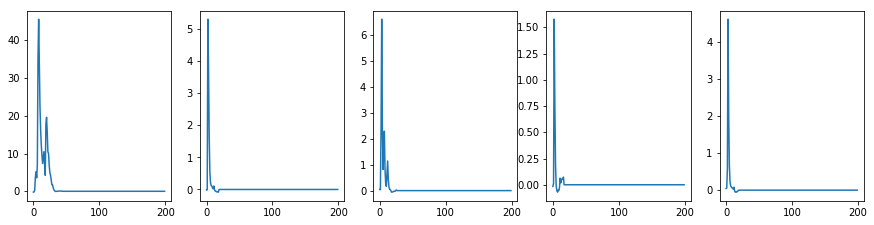

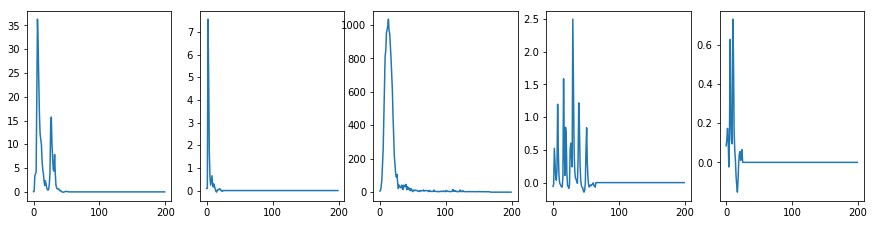

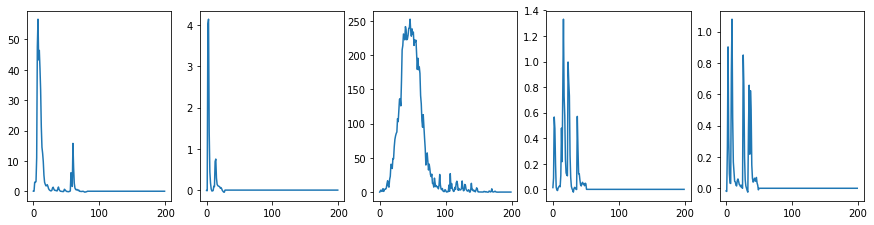

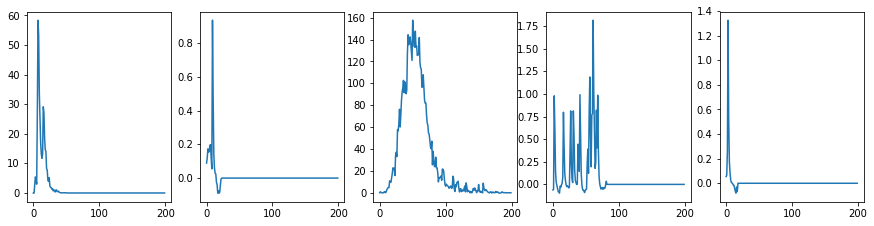

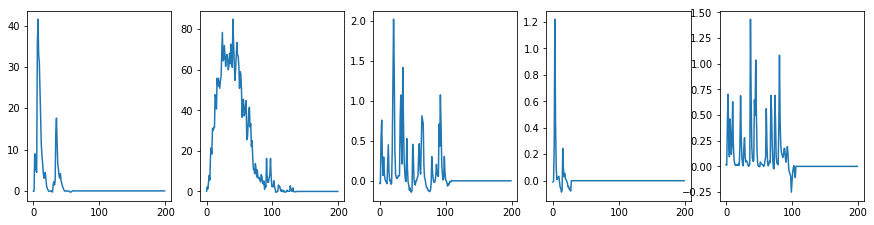

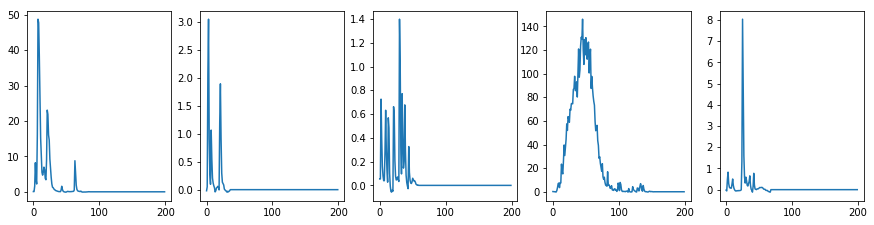

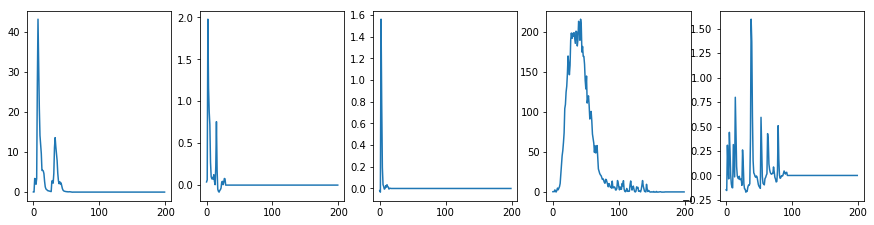

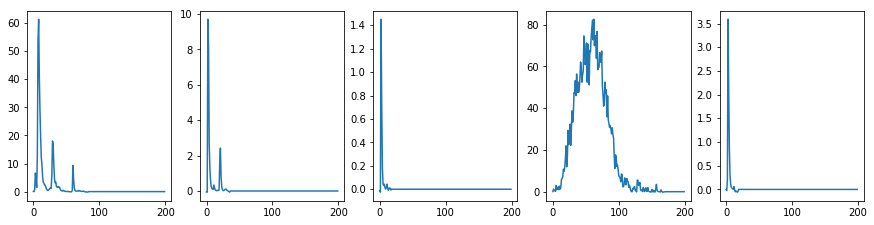

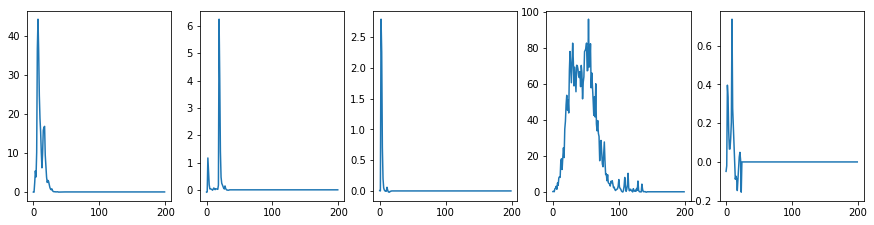

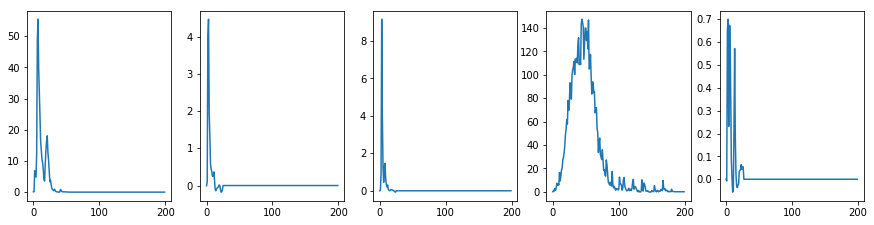

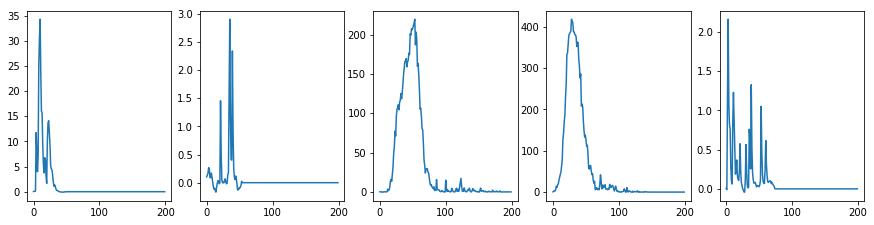

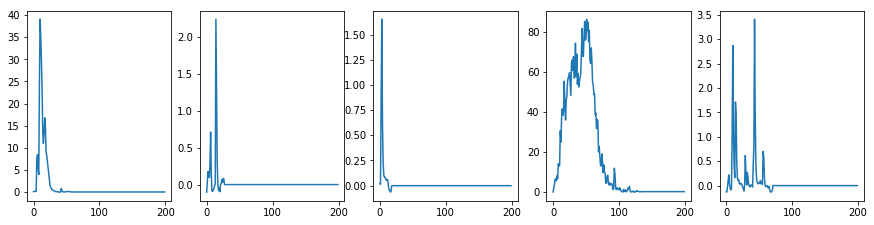

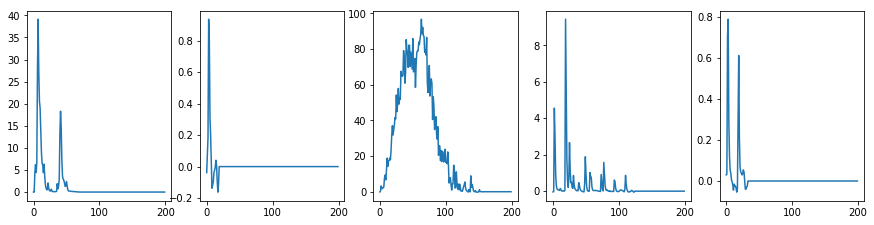

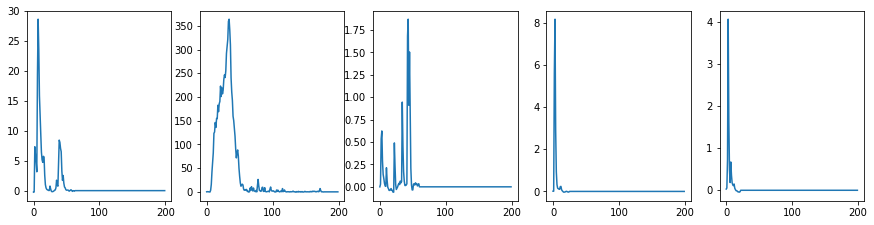

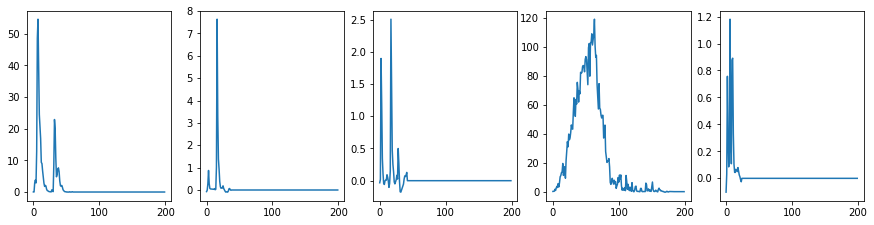

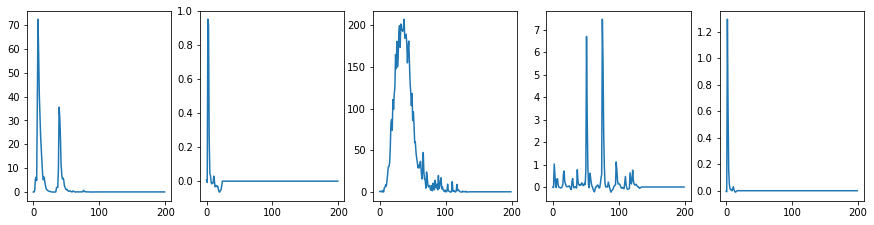

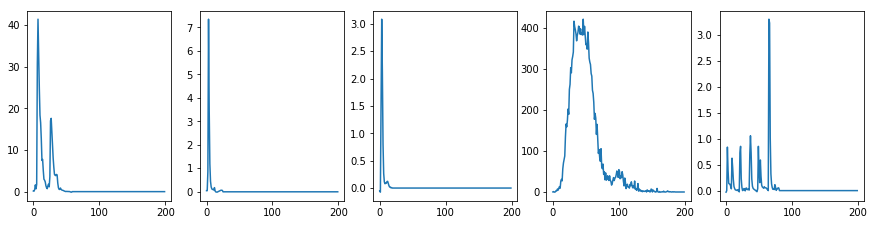

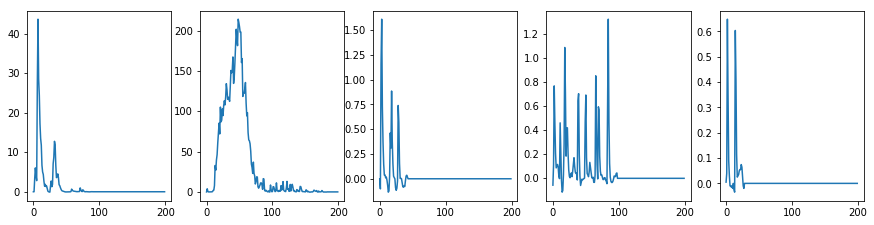

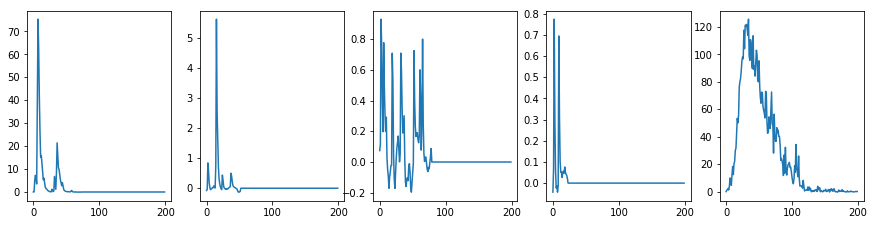

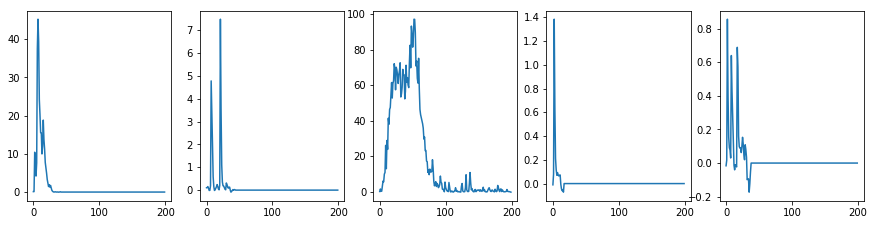

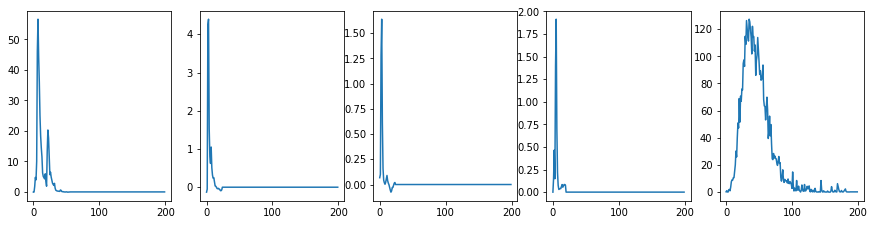

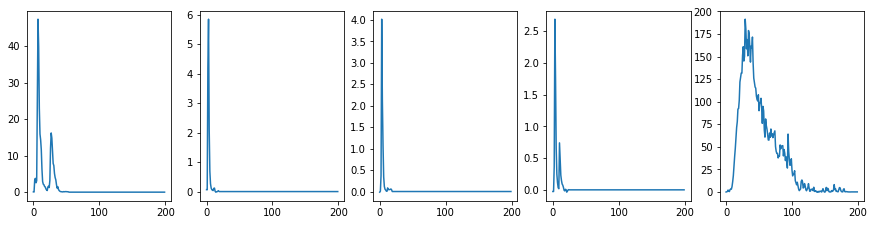

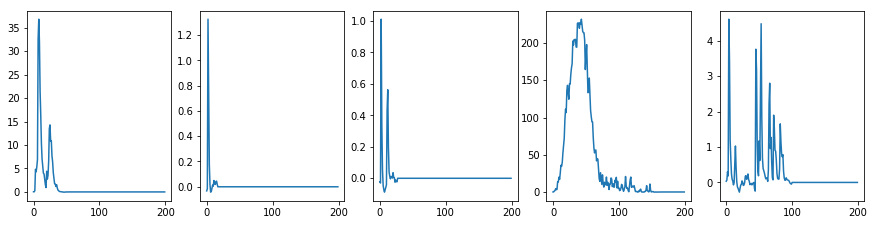

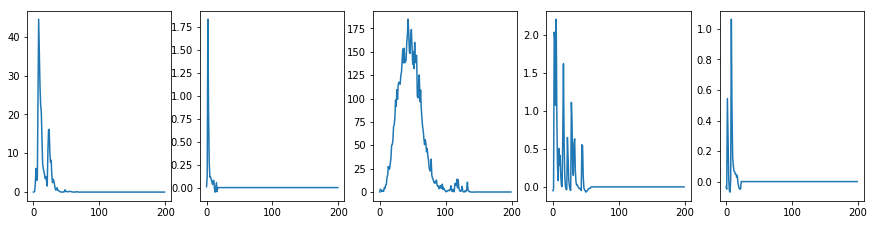

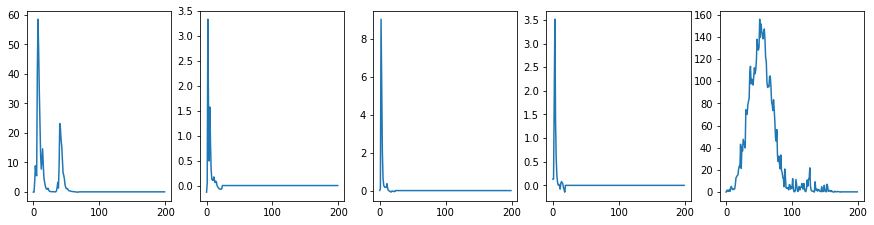

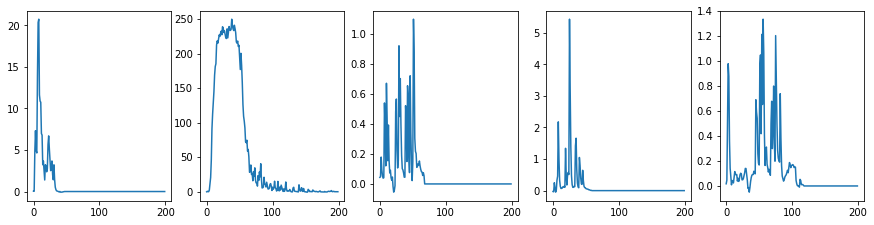

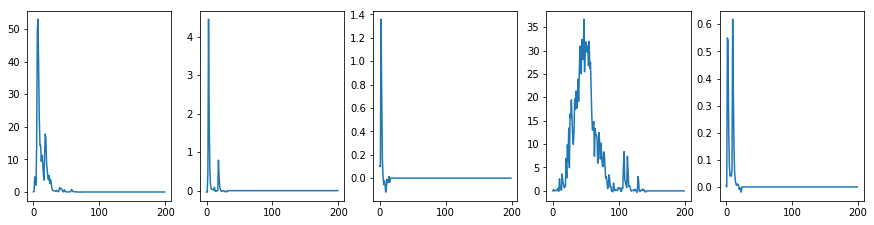

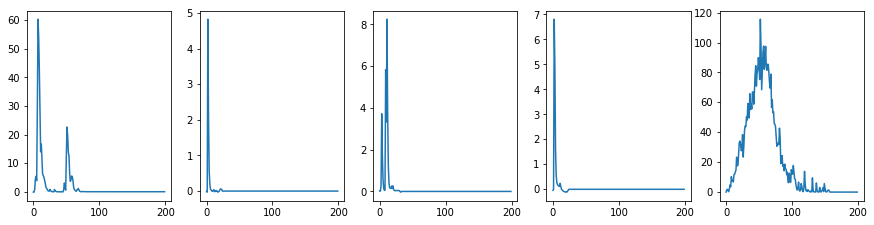

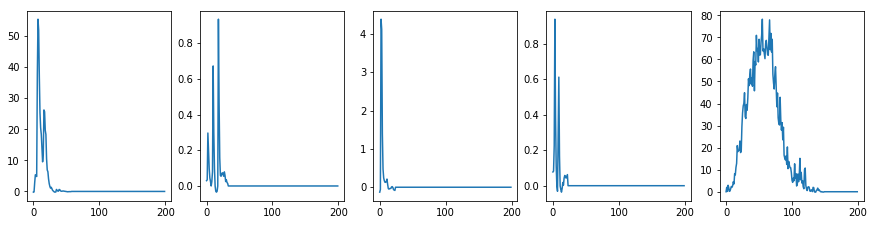

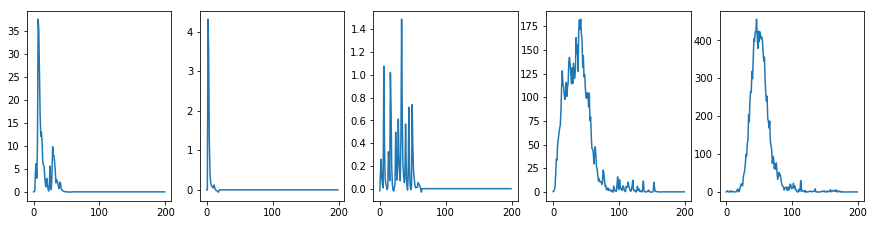

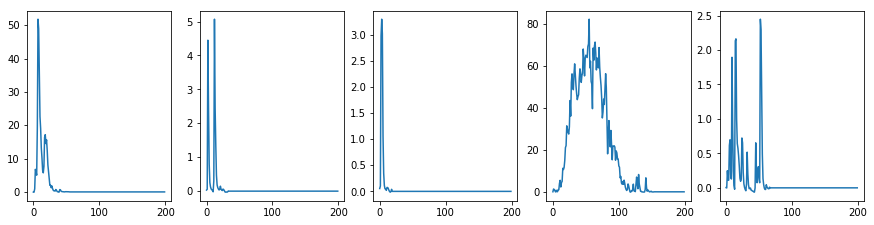

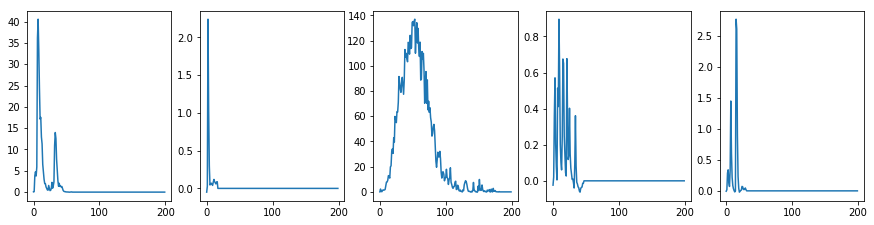

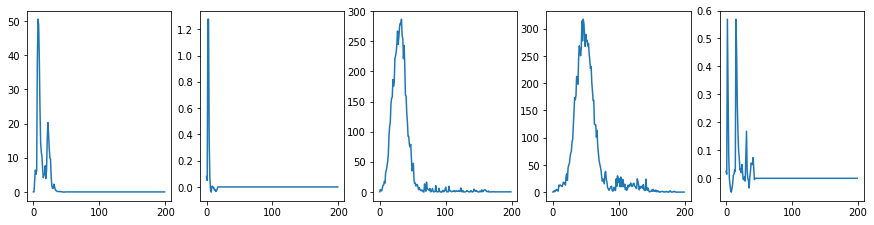

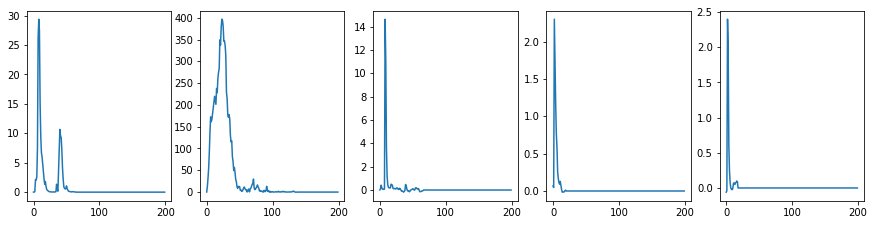

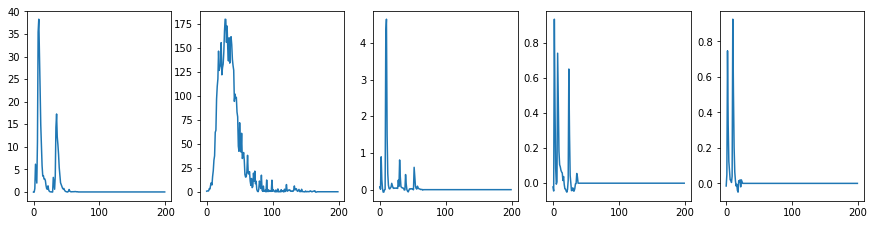

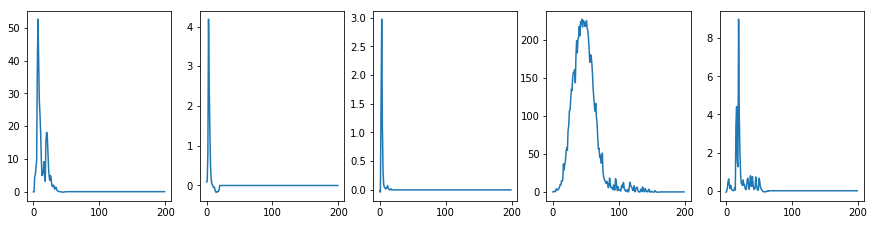

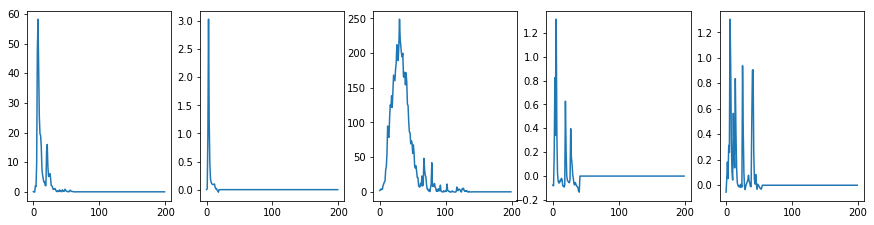

KeyboardInterrupt: 

In [22]:
left_edge  = [0, 0]
right_edge = [40500.0, -71.5]
a = ((right_edge[1])-(left_edge[1])) / ((right_edge[0])-(left_edge[0]))
b = (right_edge[1]) - a * (right_edge[0])
fiducial_r = 23

num = len(waveform)
print_counter = 0.0
for i in range(0,num-10):    
    Process(waveform,i, aii=a, bii=b, timestamp=timestamp)
    if i/num >= print_counter:
        print(round(print_counter,2), end = ' ')
        print_counter += 0.1
print(1.0, '        Run ',run, 'done!')